## 1D Linear Convection Equation - a simple hyperbolic equation (simplified case)

### 1-D linear convection model and initial conditions

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With proper initial conditions, the equation shows the propagation of the initial status with speed $c$ (spead of sound), without any change to the shape of the initial values. We will let the initial condition be $u(x,0)=u_0(x)$. The exact solution of the equation will then be $u(x,t)=u_0(x-ct)$.

### Discretizing the equation

To solve the equation numerically, we need first have this equation be discretized (in both time and space). 

Utilizing the first order forward difference scheme: 

$$\frac{\partial u}{\partial t}\approx \frac{u_i^{n+1}-u_i^n}{\Delta t}$$

The superscripts will denote the time steps and the subscripts will denote the points along the grid space. Likewise, the space derivative is discretized using a 2nd order central difference scheme:

$$\frac{\partial u}{\partial x}\approx \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x}$$

The discrete equation will therefore be:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x} = 0 $$

Because we know the initial conditions, for the first time step, the only unknown in this discretization is $u_i^{n+1}$. We can solve for this unknown to get an equation that allows us to advance in time:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{2 \Delta x}(u_{i+1}^n-u_{i-1}^n)$$

### Create the computational domain and solve the problem using a code

The spatial domain will be [0,1]. The variable `nx` is the number of grid points across the 1D domain. The variable `dx` will be the step size between any pair of adjacent grid points.

For the time, We will set the time step $\Delta t = 0.001$, calculate 300 timesteps to a total time t=0.001*300=0.3
The initial velocity $u_0$ is given as 
$u = 2$ in the interval [2dx,4dx]  and $u = 0.5$ everywhere else (as a hat function).

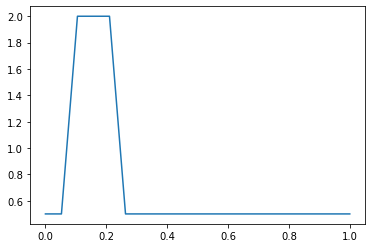

In [41]:
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline
nx = 21   #number of grid points in the 1d domain
dx = 1.0 / (nx-1)  # delta x for each subinterval
nt = 300   # total time steps, total time is nt*dt
dt = 0.001  
c = 1      
x=np.linspace(0,1,nx)
u=np.empty((nt,nx),dtype= np.float64)
u[:,0]=0.5  # boundary condition at x=0 (why the bc at x=1 is not needed?)
u[0,:]=0.5
u[0,2:5]=2.0   #init condition
plt.plot(x, u[0,:]) # plot the inital condition

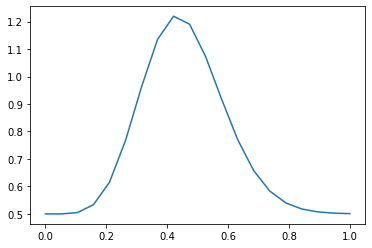

In [42]:
for n in range(1,nt):  # time steps n=1 to nt-1
    for i in range(1, nx): 
        u[n,i] = u[n-1,i] - c * dt / dx * (u[n-1,i] - u[n-1,i-1])
plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt

### Results at all the time steps:

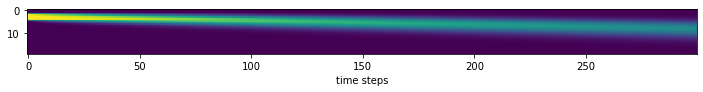

In [43]:
plt.figure(figsize=(12,6))
plt.xlabel("time steps")
plt.imshow(u.transpose())

## Discussion on the results: 
1. why the hat becomes irregular? 
2. why the intensity decrease (thus the distribution of larger values become wider)?

## Improve the simulation:
1. decrease dx
2. use second order central scheme for d/dx (why not for d/dt?)

In [ ]:
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline

c=1.0
total_distance=1.0
total_time=0.3

def convection_eq_1st(dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,1,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[:,0]=0.5  # boundary condition at x=0 (why the bc at x=1 is not needed?)
    u[0,:]=0.5
    for i in range(nx):
        if x[i]>=0.1 and x[i]<=0.25 : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx): 
            u[n,i] = u[n-1,i] - c * dt / dx * (u[n-1,i] - u[n-1,i-1])

    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the inital condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()


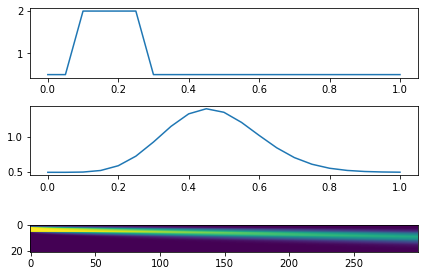

In [18]:
convection_eq_1st(0.05,0.001)

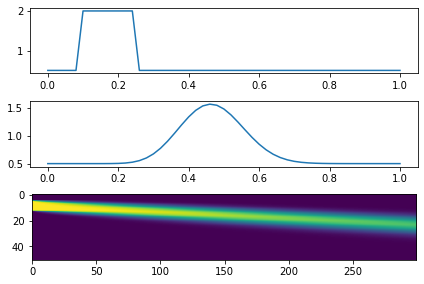

In [19]:
convection_eq_1st(0.02,0.001)

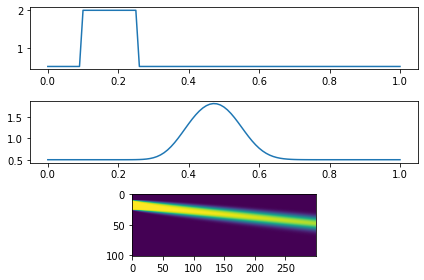

In [20]:
convection_eq_1st(0.01,0.001)

What do you observe?

Now Let consider the sencond central scheme:

In [26]:
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline

c=1.0
total_distance=1.0
total_time=0.3

def convection_eq_2nd(dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,1,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[:,0]=0.5  # boundary condition at x=0 (why the bc at x=1 is not needed?)
    u[0,:]=0.5
    for i in range(nx):
        if x[i]>=0.1 and x[i]<=0.25 : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx-1): 
            u[n,i] = u[n-1,i] - c * dt / dx/2.0 * (u[n-1,i+1] - u[n-1,i-1])
        u[n,nx-1] = u[n-1,nx-1] - c * dt / dx * (u[n-1,nx-1] - u[n-1,nx-2])
    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the inital condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()


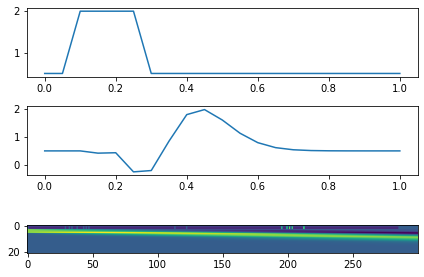

In [27]:
convection_eq_2nd(0.05,0.001)

What happend??